<a href="https://colab.research.google.com/github/priyankashinde-DS/Capstone_project-Netflix_Movies-TV_Shows/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
---

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections 
from matplotlib import cm
import plotly.graph_objs as gobj
from plotly.offline import iplot
from sklearn.cluster import DBSCAN
from sklearn import metrics

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# Let's import sch
import scipy.cluster.hierarchy as sch
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

# **2.Data importing**

#### Using Pandas Library, we’ll load the CSV file. Named it with netflix_df for the dataset.

In [3]:
# loading csv file to pandas dataframe
netflix_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Unsupervised ML-Clustring/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **3.Data Exploration**

In [4]:
# Let's take look at top row of dataset
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Shpae of Dataset
print( 'Number of Rows: {}'.format( netflix_df.shape[0] ) )
print( 'Number of Columns: {}'.format( netflix_df.shape[1] ) )

Number of Rows: 7787
Number of Columns: 12


In [7]:
netflix_df.describe().T

count        mean       std     min     25%     50%     75%  \
release_year  7787.0  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0   

                 max  
release_year  2021.0

In [8]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **4. Data Cleaning**

## **4.1 Checking NaN values**

In [9]:
#Check NAN values
NaN_df = pd.DataFrame({"No Of Total Values": netflix_df.shape[0] , "'Missing values count": netflix_df.isnull().sum(),
                    "%age of NaN values" : round((netflix_df.isnull().sum()/ netflix_df.shape[0])*100 , 2) })
NaN_df.sort_values("'Missing values count" , ascending = False)

No Of Total Values  'Missing values count  %age of NaN values
director                    7787                   2389               30.68
cast                        7787                    718                9.22
country                     7787                    507                6.51
date_added                  7787                     10                0.13
rating                      7787                      7                0.09
show_id                     7787                      0                0.00
type                        7787                      0                0.00
title                       7787                      0                0.00
release_year                7787                      0                0.00
duration                    7787                      0                0.00
listed_in                   7787                      0                0.00
description                 7787                      0                0.00

**5 columns have missing values, with Director missing 1/3 of the time.**
---

* **Director column has highest NaN values "30.7%" data is missing.**

* **Cast column has "9%" NaN values.**

* **country , date_added , rating this columns also containing missing values.**

## **4.2 Dealing with Nan Values.**

In [10]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)

## **4.3 Lets check NaN values on data_added**

In [11]:
data_added_Nan_df = netflix_df[netflix_df['date_added'].isna()]
data_added_Nan_df.head(3)

show_id     type                                        title  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories   
549     s550  TV Show              Anthony Bourdain: Parts Unknown   
2263   s2264  TV Show                                      Frasier   

         director                                               cast  \
258   No Director  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
549   No Director                                   Anthony Bourdain   
2263  No Director  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   

             country date_added  release_year rating    duration  \
258   United Kingdom        NaN          2013  TV-MA   2 Seasons   
549    United States        NaN          2018  TV-PG   5 Seasons   
2263   United States        NaN          2003  TV-PG  11 Seasons   

                                     listed_in  \
258   British TV Shows, TV Comedies, TV Dramas   
549                                 Docuseries   
2263            Classic & Cult TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...

In [12]:
data_added_Nan_df.shape

(10, 12)

* **There are only 10 observations which are containing NaN values in data_added column.**

In [13]:
print(f"Before dropping the NaN values from date_added the shape was {netflix_df.shape}")
netflix_df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {netflix_df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 12)
After dropping the NaN values from date_added now the shape is (7777, 12)


## **4.4 Checking duplicate values**

In [14]:
df_duplicate = netflix_df[netflix_df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

* **No duplicate values present in this dataset.**

# **5. Data Visualization**

## **5.1 Netflix Content By Type**

In [15]:
netflix_df['type'].value_counts().to_frame().T

Movie  TV Show
type   5377     2400

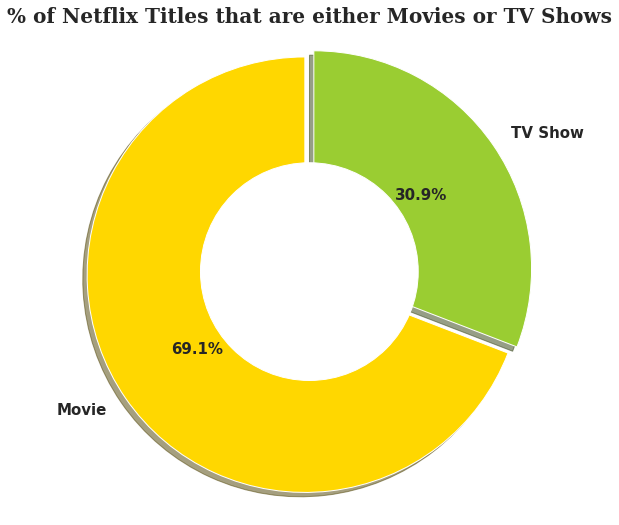

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,9))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['gold', 'yellowgreen'],
            autopct='%1.1f%%', startangle=90,shadow=True,textprops={'fontsize': 15,'fontweight':'bold'})

# scale the title up by 12% to match pctdistance
plt.title('% of Netflix Titles that are either Movies or TV Shows', fontsize=20, fontweight='bold', fontfamily='serif') 

plt.axis('equal') 

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# show plot
plt.show()

* #### **It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.(number of Movie is about twice as many as that of TV show).**

## **5.2 Title**

In [17]:
netflix_df.title.value_counts().to_frame()

title
3%                                           1
Retablo                                      1
Ricky Gervais: Humanity                      1
Richie Rich                                  1
Richard Pryor: Live in Concert               1
...                                        ...
Handsome Siblings                            1
Handsome Devil                               1
Hamza's Suitcase                             1
Hamid                                        1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS      1

[7777 rows x 1 columns]

### Let's view a wordcloud to get an overview of Netflix titles.

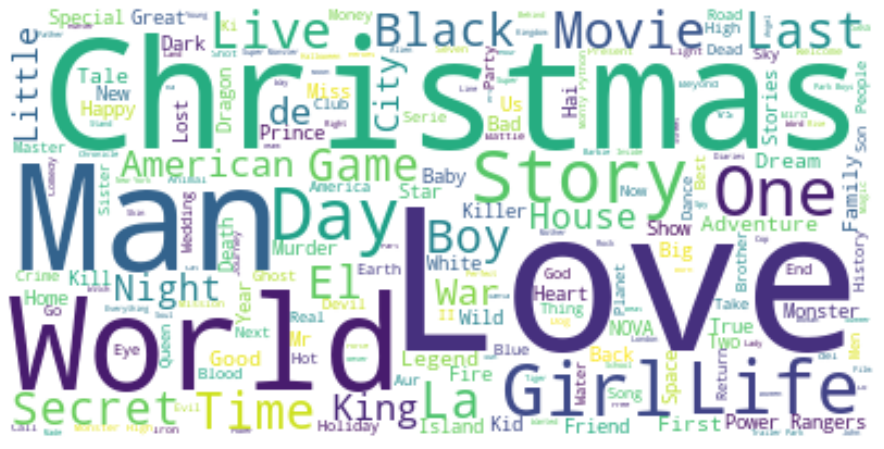

In [18]:
# set size of graph
plt.figure(figsize=(20,8))
#subsetting df
df_wordcloud = netflix_df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **5.2 country**

In [19]:
# country with there count
netflix_df.country.value_counts().rename_axis('Country').reset_index(name='Count')

Country  Count
0                                        United States   2549
1                                                India    923
2                                       United Kingdom    396
3                                                Japan    225
4                                          South Korea    183
..                                                 ...    ...
676                       Russia, United States, China      1
677                Italy, Switzerland, France, Germany      1
678              United States, United Kingdom, Canada      1
679               United States, United Kingdom, Japan      1
680  Sweden, Czech Republic, United Kingdom, Denmar...      1

[681 rows x 2 columns]

In [20]:
netflix_df[['country','type','title']].tail(5)

country     type  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    Movie   
7783                                              India    Movie   
7784                                                NaN    Movie   
7785                                          Australia  TV Show   
7786              United Kingdom, Canada, United States    Movie   

                                        title  
7782                                     Zozo  
7783                                   Zubaan  
7784                        Zulu Man in Japan  
7785                    Zumbo's Just Desserts  
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS

In [21]:
netflix_df.country.nunique()

681

##### In total, there are **"681" countries** that produce movies and tv shows. This is because one movie/ tv show can be made by more than one country, like the movie **ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS**, that was produced by the **United Kingdom, Canada, and the United States.**

In [22]:
netflix_df['country'].isna().sum()

506

####Replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. 

####So instead of dropping the whole column we just replaced the values in it in order to save our data.

In [23]:
# check most common country?
netflix_df['country'].mode()[0]

'United States'

In [24]:
# # Replace null values in country column with the United States
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Check if all the null values in country column are filled
netflix_df.country.isna().sum()

0

#### There is no NaN values present in **country column.**

In [25]:
# define list to store country names 
country_list=[]
# list to store country for Tv-show produced
tv_show=[]
#list to store country for movie produced
movies=[]
for i in range(0,len(netflix_df)):
  if isinstance(netflix_df['country'].iloc[i] , str):
    split=netflix_df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if netflix_df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip()) # append the values
      if netflix_df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [26]:
# create new dataframe 
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
# sorting values
country_df=country_df.sort_values('Productions',ascending=False)
# reset index
country_df=country_df.reset_index()
# drop  index column
country_df=country_df.drop('index',axis=1)

In [27]:
#Top 5 countries
country_df.head()

country  Productions  TV-Shows  Movies
0   United States         3797      1136    2661
1           India          990        75     915
2  United Kingdom          722       255     467
3          Canada          412       126     286
4          France          349        84     265

In [28]:
# create list of country
categories = ", ".join(netflix_df['country']).split(",")

# list of most common 50 country
counter_list = collections.Counter(categories).most_common(50)
counter_list = counter_list[0:50]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = gobj.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))


#initializing the data variable
data = dict(type = 'choropleth',
            
            locations = labels,
            locationmode = 'country names',
            colorscale= 'Portland',
            
            text= labels,
            z=values,
            colorbar = {'title':'Country Colours', 'len':300,'lenmode':'pixels' })

layout = dict(geo = {'scope':'world'}, title_text ='Netflix shows in each country')

col_map = gobj.Figure(data = [data],layout = layout)

iplot(col_map)

In [29]:
# create count column for various plots
netflix_df['count'] = 1

# Lets retrieve just the first country from country col.
netflix_df['first_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])

# Reducing name length
netflix_df['first_country'].replace('United States', 'USA', inplace=True)
netflix_df['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

# Let's check few country
netflix_df['first_country'].head().to_frame()

first_country
0        Brazil
1        Mexico
2     Singapore
3           USA
4           USA

Text(0.5, 1.0, 'Top 10 countries on Netflix')

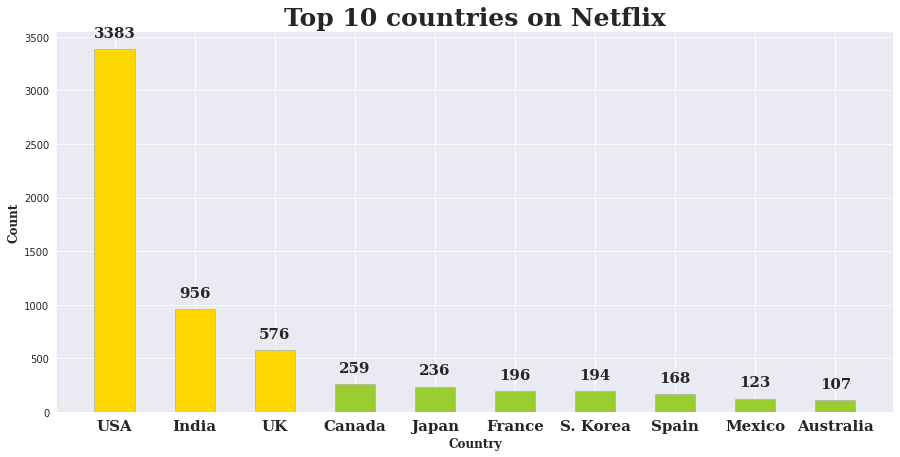

In [30]:
# create new dataframe 
data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

color_map = ['yellowgreen' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  'gold' # color highlight

fig, ax = plt.subplots(1,1, figsize=(15, 7))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='bold', fontfamily='serif', fontsize=15)
  
ax.set_xticklabels(data.index,fontweight='bold', fontfamily='serif', fontsize=15)
plt.xlabel('Country',fontfamily='serif', fontsize=12,fontweight='bold')
plt.ylabel('Count',fontfamily='serif', fontsize=12,fontweight='bold')
ax.set_title( 'Top 10 countries on Netflix', fontsize=25, fontweight='bold', fontfamily='serif')

* **The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.**

* **It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.**

## **How does content by country vary?**

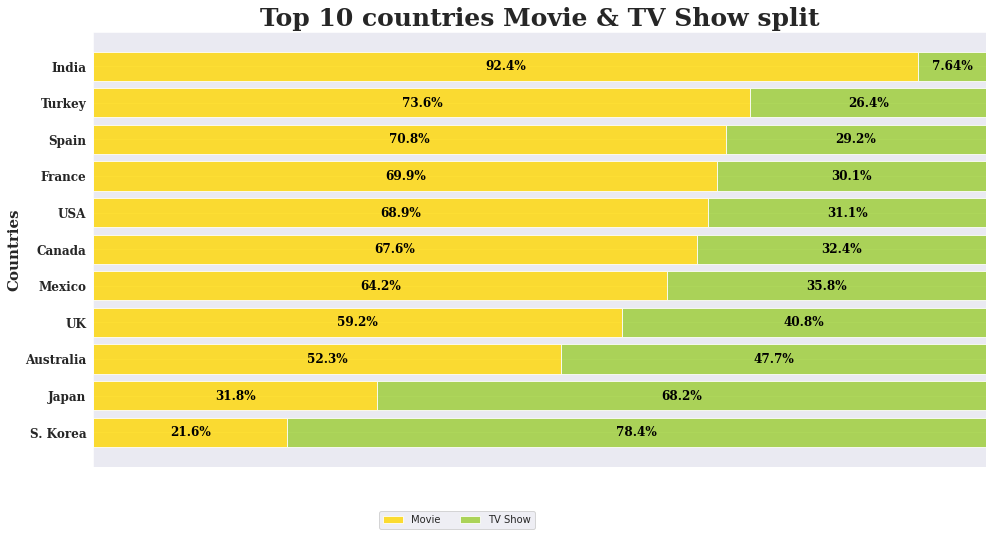

In [31]:
# top country
country_order = netflix_df['first_country'].value_counts()[:11].index
# create new dataframe 
data_q2q3 = netflix_df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
# sum
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


###
fig, ax = plt.subplots(1,1,figsize=(16, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='gold', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='yellowgreen', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontweight='bold', fontfamily='serif',fontsize=12)
ax.set_title('Top 10 countries Movie & TV Show split', fontsize=25, fontweight='bold', fontfamily='serif')
plt.ylabel('Countries',fontweight='bold', fontfamily='serif',fontsize=15)   
ax.legend(loc='best', ncol=3 ,bbox_to_anchor=(0.5, -0.09))


# movie percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='black')
# tv show percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='black')

* **Interestingly, Netflix in India
is made up nearly entirely of Movies.** 

* **Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.**

* "**South Korean" Netflix on the other hand is 
almost entirely TV Shows.**

* **The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.**

## **5.3 Director**

### **Who are the top 10 directors on Netflix with the most releases?**


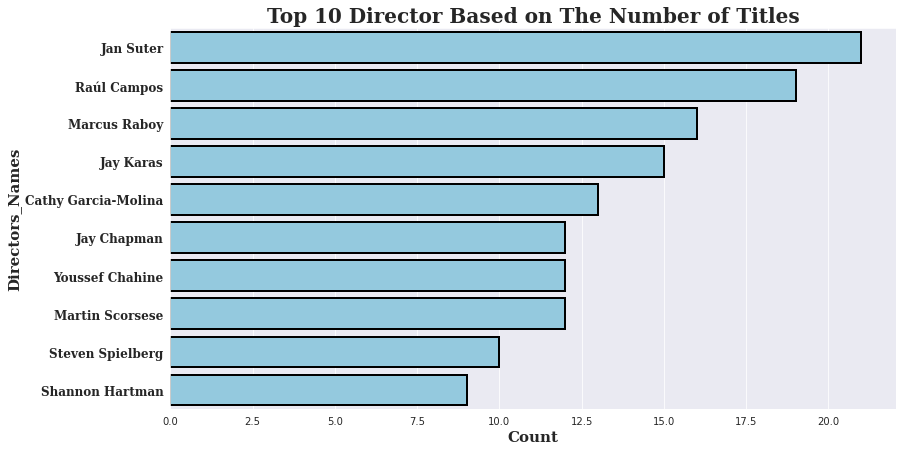

In [32]:
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles', fontsize=20, fontweight='bold', fontfamily='serif')
ax = sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10],color='skyblue',linewidth=2,edgecolor='black')
ax.set_yticklabels(filtered_directors.value_counts().index[:10], fontweight='bold', fontfamily='serif',fontsize=12)
plt.xlabel('Count', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Directors_Names', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

## **5.4 Cast**

In [33]:
# create movie df
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
#create tvshow df
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
#create year col
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

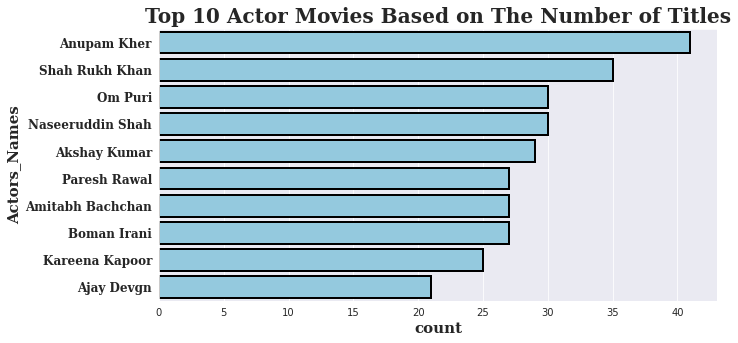

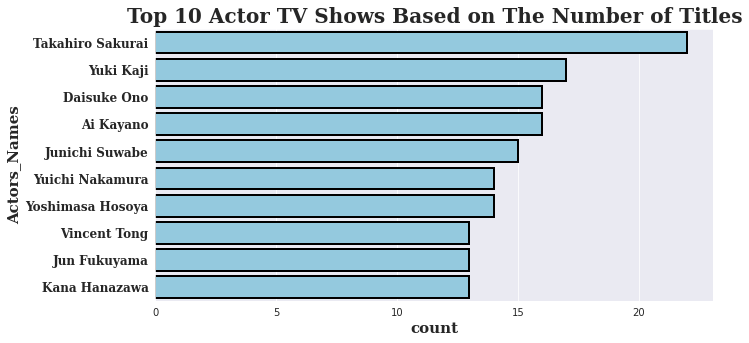

In [34]:
plt.figure(figsize=(10,5))
#top actor movies
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.title('Top 10 Actor Movies Based on The Number of Titles', fontsize=20, fontweight='bold', fontfamily='serif')
ax = sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], color='skyblue',linewidth=2,edgecolor='black')
ax.set_yticklabels(filtered_cast_movie.value_counts().index[:10], fontweight='bold', fontfamily='serif',fontsize=12)
plt.xlabel('count', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Actors_Names', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

plt.figure(figsize=(10,5))
#. Top Actor TV Shows on Netflix
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.title('Top 10 Actor TV Shows Based on The Number of Titles', fontsize=20, fontweight='bold', fontfamily='serif')
ax = sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], color='skyblue',linewidth=2,edgecolor='black')
ax.set_yticklabels(filtered_cast_shows.value_counts().index[:10], fontweight='bold', fontfamily='serif',fontsize=12)
plt.xlabel('count', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Actors_Names', fontsize=15, fontweight='bold', fontfamily='serif')


plt.show()


#### The top actor on Netflix Movies, based on the number of titles, is **Anupam Kher.**

#### The top actor on Netflix TV-Shows, based on the number of titles, is **Takahiro Sakurai.**

## **5.5 Release year**

In [35]:
# unique release year
netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [36]:
# year count
netflix_df['release_year'].value_counts().to_frame()

release_year
2018          1120
2017          1012
2019           996
2016           881
2020           868
...            ...
1925             1
1964             1
1966             1
1947             1
1959             1

[73 rows x 1 columns]

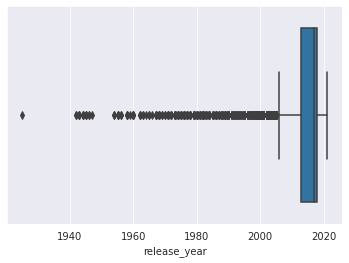

In [37]:
#plot relase year
sns.boxplot(netflix_df.release_year)

In [38]:
# top 15 relase year for  movie and tv shows
movie_release_yr = netflix_movies_df['release_year'].value_counts().sort_index(ascending=False).head(15)
shows_release_yr = netflix_shows_df['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=netflix_df['release_year'].value_counts().sort_index(ascending=False).head(15)

### **Is Netflix has increasingly focusing on TV rather than movies in recent years?**

Text(0.5, 1.0, 'Production Growth Yearly')

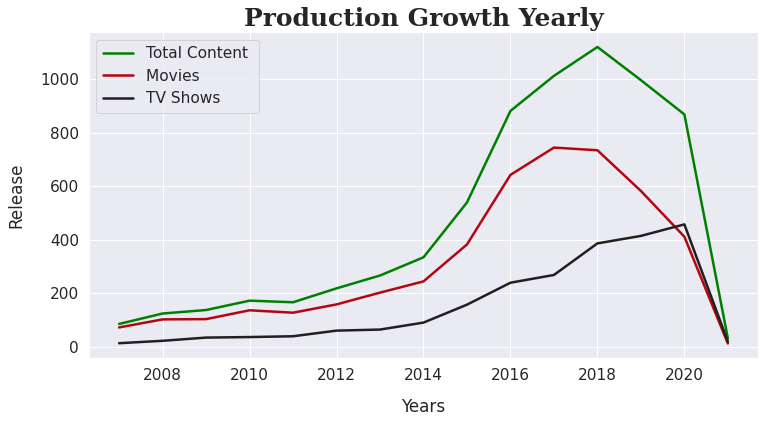

In [39]:
# set background 
sns.set(font_scale=1.4)
# 1st lineplot
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content ")
# 2nd lineplot
movie_release_yr.plot(figsize=(12, 6), linewidth=2.5, color='#b20710',label="Movies ")
#3rd lineplot
shows_release_yr.plot(figsize=(12, 6), linewidth=2.5, color='#221f1f',label="TV Shows ")
# set x label
plt.xlabel("Years", labelpad=15)
# set y label
plt.ylabel("Release", labelpad=15)
plt.legend()
# set title
plt.title("Production Growth Yearly", fontsize=25, fontweight='bold', fontfamily='serif')

### **We can see  that in above graph the most number of TV Shows released in 2017 and for Movies it is 2020**

## **How has content been added over the years?**

In [40]:
# create new column of year from date_added col..
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df.date_added).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df.date_added).year

In [41]:
# create dataframes for movies and tv shows top 15
yearadd_shows=netflix_shows_df['year_added'].value_counts().sort_index(ascending=False).head(15)
yearadd_movies=netflix_movies_df['year_added'].value_counts().sort_index(ascending=False).head(15)

Text(0.5, 1.0, 'Movies & TV Shows added over each year')

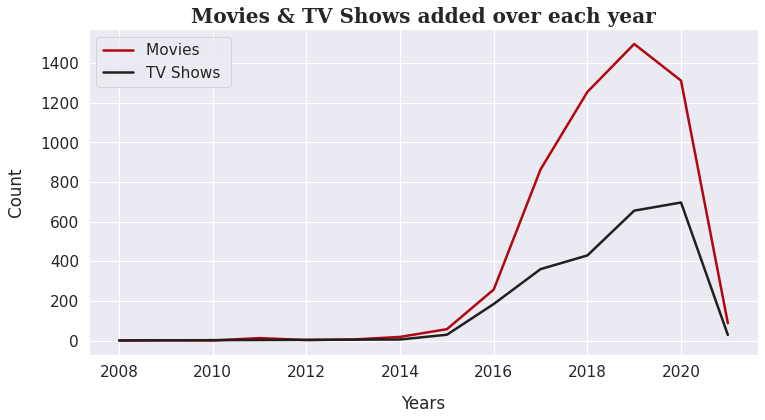

In [42]:
# set background
sns.set(font_scale=1.4)
# 1st lineplot
yearadd_movies.plot(figsize=(12, 6), linewidth=2.5, color='#b20710',label="Movies ")
# 2nd lineplot
yearadd_shows.plot(figsize=(12, 6), linewidth=2.5, color='#221f1f',label="TV Shows ")
# set x label
plt.xlabel("Years", labelpad=15)
# set y label
plt.ylabel("Count", labelpad=15)
plt.legend()
# set title
plt.title('Movies & TV Shows added over each year', fontsize=20, fontweight='bold', fontfamily='serif')

* **We see a slow start for Netflix over several years. 
Things begin to pick up in 2014 and then there is a 
rapid increase from 2016.**

* **It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.**

* **Netflix peak global content amount was in 2019.**

* **It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.**

## **Month-by-Month**

### We've seen how content has increased over the years, but are there certain months that, on average, tend to enjoy more content being added?

In [43]:
# import calender
import calendar

In [44]:
# create new column of month from date_added col..
netflix_df['month_name_added'] = pd.DatetimeIndex(netflix_df.date_added).month

# get months name 
netflix_df['month_name_added'] = netflix_df['month_name_added'].apply(lambda x: calendar.month_abbr[x])

In [45]:
# month count
netflix_df['month_name_added'].value_counts().sort_values(ascending=False)

Dec    833
Oct    785
Jan    757
Nov    738
Mar    669
Sep    619
Aug    618
Apr    601
Jul    600
May    543
Jun    542
Feb    472
Name: month_name_added, dtype: int64

In [46]:
# months name
netflix_df['month_name_added'].value_counts().sort_values(ascending=False).index

Index(['Dec', 'Oct', 'Jan', 'Nov', 'Mar', 'Sep', 'Aug', 'Apr', 'Jul', 'May',
       'Jun', 'Feb'],
      dtype='object')

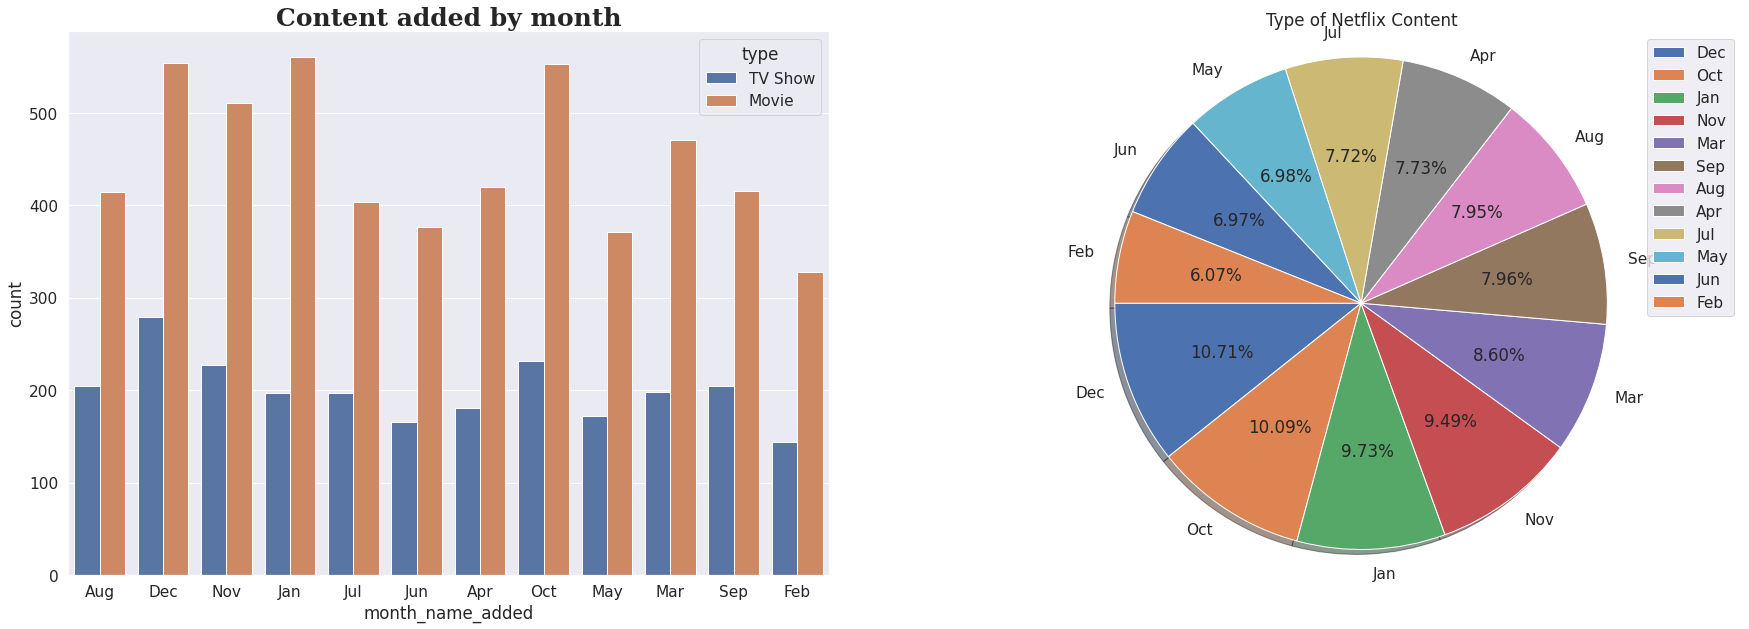

In [47]:
# set size of graph
plt.figure(figsize=(30,10))
plt.subplot(121)
# plot countplot
ax = sns.countplot(netflix_df['month_name_added'],hue=netflix_df.type)
# set title
ax.set_title('Content added by month', fontsize=25, fontweight='bold', fontfamily='serif')

plt.subplot(122)
#Plotting pie chart on type feature
labels = netflix_df['month_name_added'].value_counts().sort_values(ascending=False).index

plt.pie(netflix_df['month_name_added'].value_counts().sort_values(ascending=False),labels=labels,
        autopct='%1.2f%%', startangle=180,shadow=True)
# set title
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.legend(labels,loc='best')
plt.show()

### The end & beginnings of each year seem to be Netflix's preference for adding content.

### **December & October** are definitely the best months for new content. Maybe Netflix knows that people have a lot of time off from work over this period.

## **5.6 Netflix Rating**

In [48]:
netflix_df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

### **Rating Label	Description.**
---
**TV-MA:**This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17

**TV-14:**	This program may be unsuitable for children under 14 years of age

**TV-PG:**	This program contains material that parents may find unsuitable for younger children. Parental guidance is recommended

**R:**	May be unsuitable for children under the age of 17 (Under 17 requires accompanying parent or adult guardian)

**TV-Y:**	This program is aimed at a very young audience, including children from ages 2–6

**TV-PG:**	This program contains material that parents may find unsuitable for younger children. Parental guidance is recommended

**TV-Y7:**	This program is most appropriate for children age 7 and up

**TV-G:**	This program is suitable for all ages.

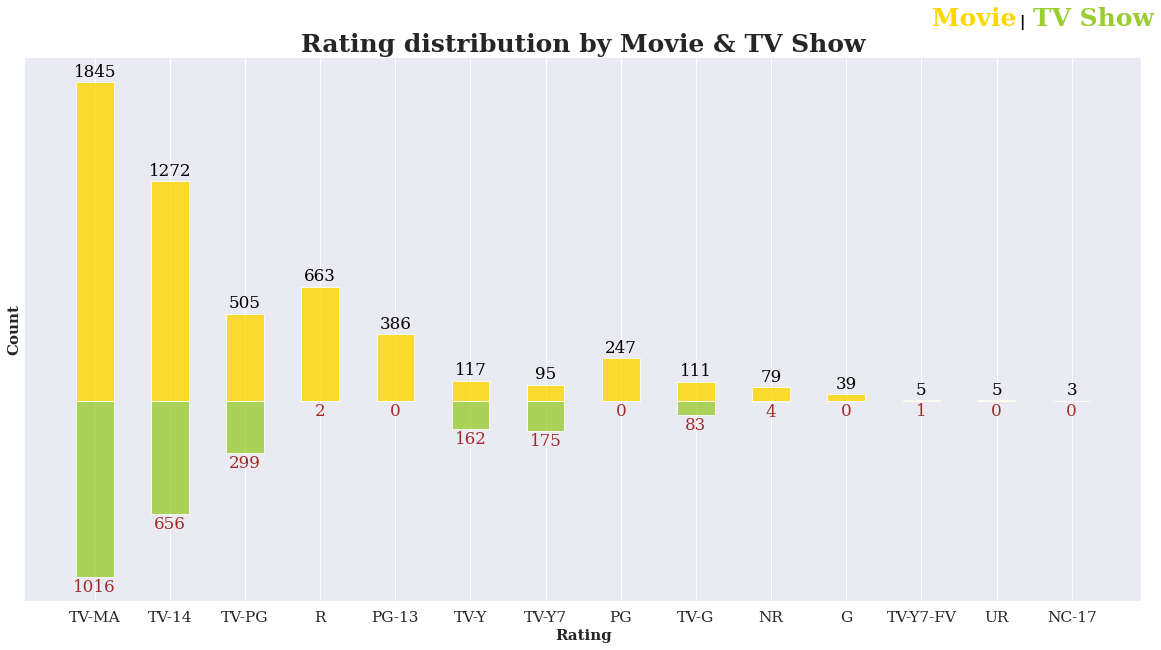

In [49]:
# create datframe for rating count
order = pd.DataFrame(netflix_df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])
mf = netflix_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax.bar(movie.index, movie, width=0.5, color='gold', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='yellowgreen', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='brown')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
ax.set_title('Rating distribution by Movie & TV Show', fontsize=25, fontweight='bold', fontfamily='serif')
plt.xlabel('Rating', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=25, color='gold')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=25, color='yellowgreen')


plt.show()

### In above graph we see there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.

#### **5.6.1 Target Ages**

#### Does Netflix uniformly target certain demographics? Or does this vary by country?

In [50]:
# make dict of rating
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['target_ages'] = netflix_df['rating'].replace(ratings_ages)
netflix_df['target_ages'].unique()

# Genre

netflix_df['genre'] = netflix_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]


In [51]:
# create dataframe 
data = netflix_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']


df_heatmap = netflix_df.loc[netflix_df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

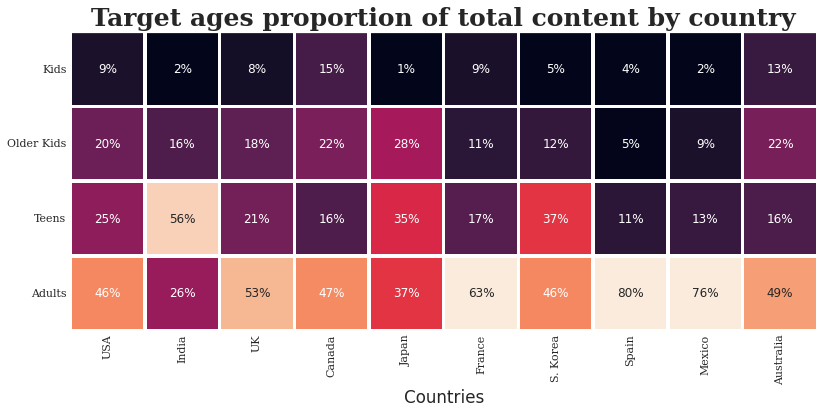

In [52]:
# set size of graph
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# country order
country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', 'Australia']
# age order
age_order = ['Kids','Older Kids','Teens','Adults']

#plot heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order2],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


ax.set_title('Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=25)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('Countries')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### **Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.**

## **5.7 Netflix Movie & TV-Shows Duration**

In [53]:
# unique values
netflix_movies_df.duration.unique()

array(['93 min', '78 min', '80 min', '123 min', '95 min', '119 min',
       '118 min', '143 min', '103 min', '89 min', '91 min', '149 min',
       '144 min', '124 min', '87 min', '110 min', '128 min', '117 min',
       '100 min', '84 min', '99 min', '90 min', '102 min', '104 min',
       '105 min', '56 min', '125 min', '81 min', '97 min', '106 min',
       '107 min', '109 min', '44 min', '75 min', '101 min', '37 min',
       '113 min', '114 min', '130 min', '94 min', '140 min', '135 min',
       '82 min', '70 min', '121 min', '92 min', '164 min', '53 min',
       '83 min', '116 min', '86 min', '120 min', '96 min', '126 min',
       '129 min', '77 min', '137 min', '148 min', '28 min', '122 min',
       '176 min', '85 min', '22 min', '68 min', '111 min', '29 min',
       '142 min', '168 min', '21 min', '59 min', '20 min', '98 min',
       '108 min', '76 min', '26 min', '156 min', '30 min', '57 min',
       '150 min', '133 min', '115 min', '154 min', '127 min', '146 min',
       '136 min'

In [54]:
# unique values in duration
netflix_shows_df.duration.unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [55]:
# replaced all the min with null string
netflix_movies_df['duration'] = netflix_movies_df.duration.str.replace("min" , "")
# change str to int
netflix_movies_df['duration'] = netflix_movies_df['duration'].astype(int)
# replaced all the min with null string
netflix_shows_df['duration'] = netflix_shows_df.duration.str.replace("Seasons" , "")

netflix_shows_df['duration'] = netflix_shows_df.duration.str.replace("Season" , "")

# change str to int
netflix_shows_df['duration'] = netflix_shows_df['duration'].astype(int)


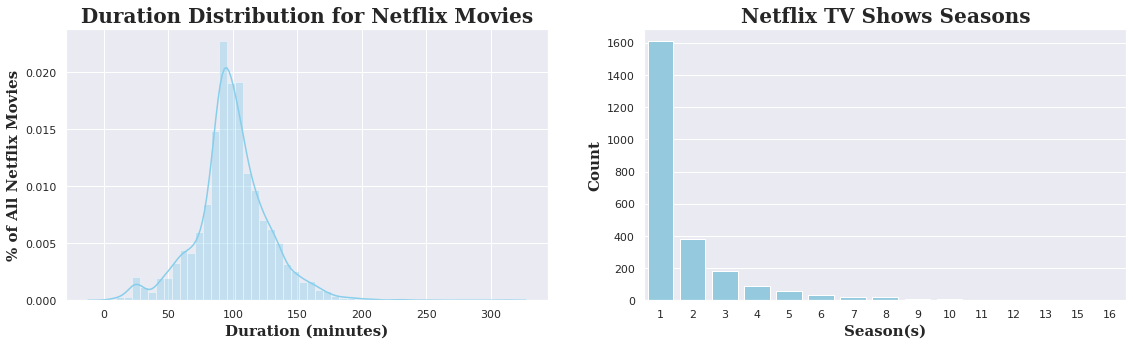

In [56]:
# set background
sns.set(style="darkgrid")
# set the size of graph
fig, ax2 = plt.subplots(1,2, figsize=(19, 5))
# plot distplot for movie
ax0 = sns.distplot(netflix_movies_df.duration, color='skyblue',ax=ax2[0]);
# set title
ax0.set_title("Duration Distribution for Netflix Movies",fontsize=20, fontweight='bold', fontfamily='serif')
 # set y label
ax0.set_ylabel("% of All Netflix Movies",fontsize=15, fontweight='bold', fontfamily='serif')
ax0.set_xlabel("Duration (minutes)",fontsize=15, fontweight='bold', fontfamily='serif')

# plot distplot for shows
ax1=sns.countplot(netflix_shows_df.duration, color='skyblue',ax=ax2[1]);
ax1.set_title("Netflix TV Shows Seasons",fontsize=20, fontweight='bold', fontfamily='serif')
ax1.set_ylabel("Count",fontsize=15, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("Season(s)",fontsize=15, fontweight='bold', fontfamily='serif')

fig.show()

Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes.

---
Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

In [57]:
# duration count
netflix_df.duration.value_counts().to_frame()

duration
1 Season       1608
2 Seasons       378
3 Seasons       183
90 min          136
93 min          131
...             ...
9 min             1
182 min           1
224 min           1
233 min           1
191 min           1

[216 rows x 1 columns]

## **5.8 Listed_in**

In [58]:
netflix_df.listed_in.value_counts().to_frame()

listed_in
Documentaries                                             334
Stand-Up Comedy                                           321
Dramas, International Movies                              320
Comedies, Dramas, International Movies                    243
Dramas, Independent Movies, International Movies          215
...                                                       ...
Anime Series, Crime TV Shows, TV Thrillers                  1
Crime TV Shows, Romantic TV Shows, Spanish-Lang...          1
Crime TV Shows, International TV Shows, Reality TV          1
International Movies, Romantic Movies, Sci-Fi &...          1
International TV Shows, Spanish-Language TV Sho...          1

[491 rows x 1 columns]

In [59]:
# define list to store category name
category_list = []
for categories in netflix_df.listed_in.values:
  len_categories = len(categories.split(","))
  category_list.append(len_categories)

In [60]:
###Adding a new column category_count which will contain count of category
netflix_df['category_count'] = category_list

In [61]:
# lets check created new column
netflix_df[['listed_in' , 'category_count']].head()

listed_in  category_count
0  International TV Shows, TV Dramas, TV Sci-Fi &...               3
1                       Dramas, International Movies               2
2                Horror Movies, International Movies               2
3  Action & Adventure, Independent Movies, Sci-Fi...               3
4                                             Dramas               1

In [62]:
# split the category name
category = ", ".join(netflix_df['listed_in']).split(", ")

In [63]:
# most 50 occured category name and count
category_list = collections.Counter(category).most_common(50)
category_list_top = category_list[:10]
# reverse the list
top_10_category = category_list_top[ ::-1]
# top 10 category
top_10_category

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [64]:
# list to store name and count of category
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_category:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

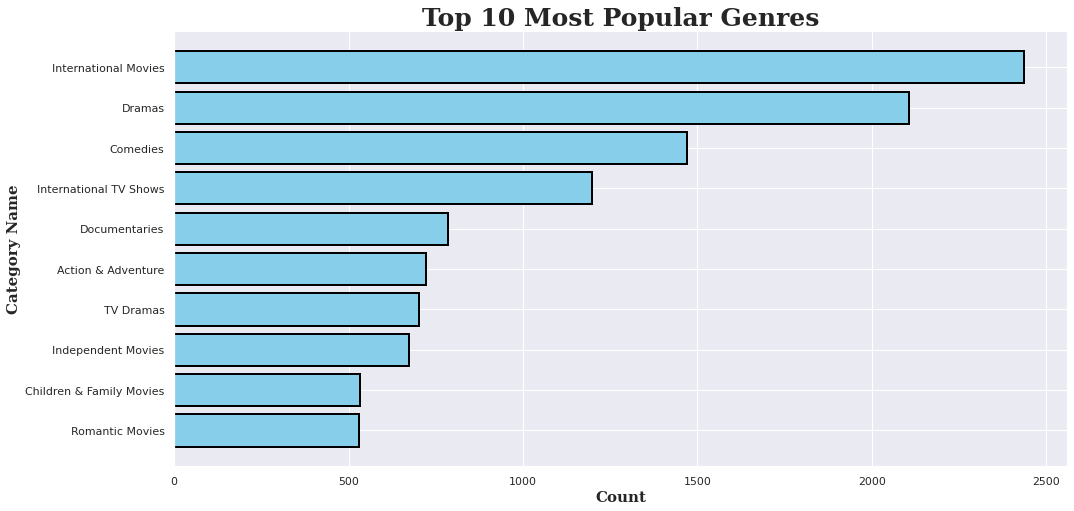

In [65]:
# plot graph for category
plt.figure( figsize = (16,8))
ax = plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color='skyblue',linewidth=2,edgecolor='black')
plt.title("Top 10 Most Popular Genres",fontname = "serif",fontsize=25, fontweight='bold')
plt.xlabel("Count", fontname = "serif",fontsize=15, fontweight='bold' )
plt.ylabel("Category Name" ,fontname = "serif",fontsize=15, fontweight='bold' )
plt.show()

### Let's have a quick look at the lag between when content is released and when it is added on Netflix.

In [66]:
netflix_df.type

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7782      Movie
7783      Movie
7784      Movie
7785    TV Show
7786      Movie
Name: type, Length: 7777, dtype: object

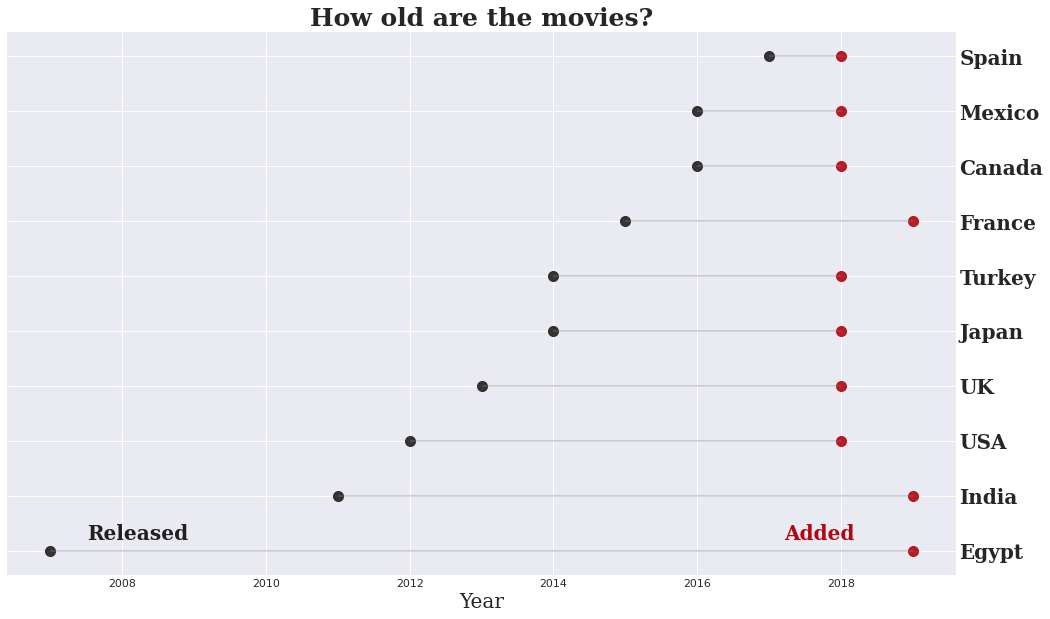

In [67]:
# create new dataframe and sorting values
data = netflix_movies_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]

# top 10 country
data = data['first_country']

df_loli = netflix_movies_df.loc[netflix_movies_df['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')


my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(17, 10))

ax.set_title('How old are the movies?', fontsize=25, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=20, fontweight='bold')

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=20, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=20, color='#b20710')


plt.xlabel('Year', fontsize=20, fontweight='light', fontfamily='serif')
plt.show()


* **The average gap between when 
content is released, and when it
is then added on Netflix varies
by country.** 

* **In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.**

### What about TV shows...

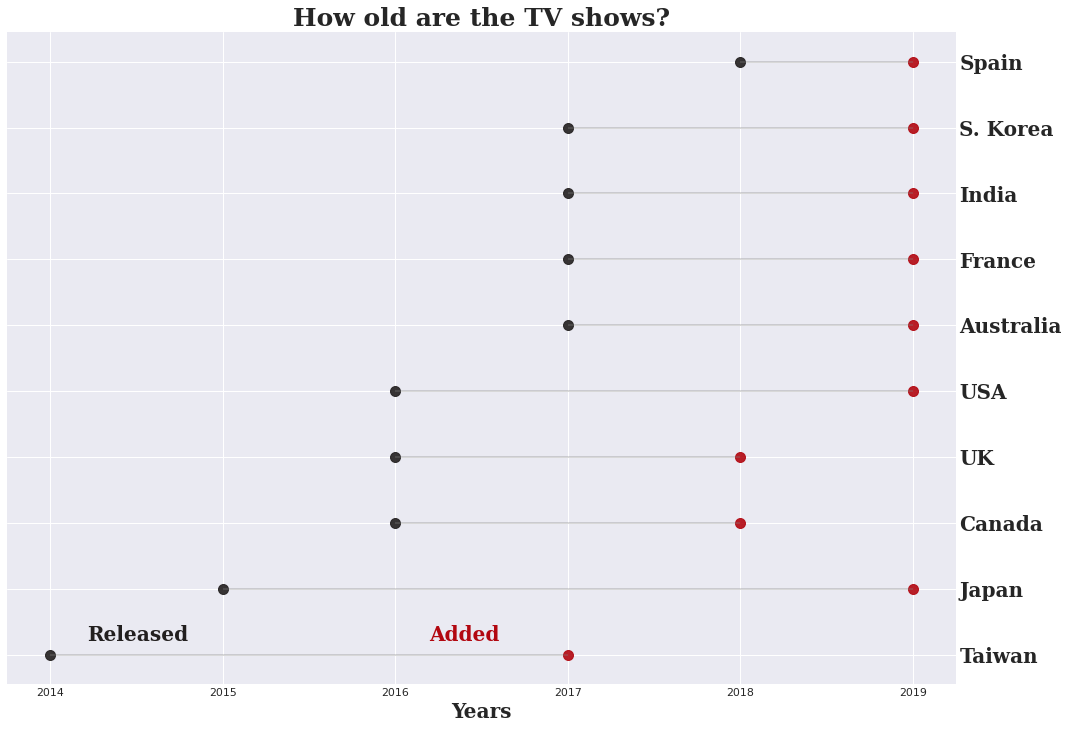

In [68]:
# create dataframe and sorting values
data = netflix_shows_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = netflix_shows_df.loc[netflix_shows_df['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(17, 12))

ax.set_title('How old are the TV shows?', fontsize=25, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=20,fontweight="bold")


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=20, color='#221f1f')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=20, color='#b20710')



ax.tick_params(axis=u'both', which=u'both',length=0)
plt.xlabel('Years', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()


* **The gap for TV shows seems
more regular than for movies.**

* **This is likely due to subsequent
series being released
year-on-year.**

* **Spain seems to have
the newest content
overall.**

# **nlp(preprocessing)**

## **listed_in**

### **Removing punctuations**

In [69]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [70]:
# remove punctuation
netflix_df['listed_in'] = netflix_df['listed_in'].apply(remove_punctuation)
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows TV Dramas TV SciFi  Fan...   
1                        Dramas International Movies   
2                 Horror Movies International Movies   
3  Action  Adventure Independent Movies SciFi  Fa...   
4                                             Dramas   

                                         description  count first_country  \
0  In a future where the elite inhabit an island ...      1        Brazil   
1  After a devastating earthquake hits Mexico Cit...      1        Mexico   
2  When an army recruit is found dead, his fellow...      1     Singapore   
3  In a postapocalyptic world, rag-doll robots hi...      1           USA   
4  A brilliant group of students become card-coun...      1           USA   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   
3              Nov       Teens   
4              Jan       Teens   

                                               genre  category_count  
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3  
1                     [Dramas, International Movies]               2  
2              [Horror Movies, International Movies]               2  
3  [Action & Adventure, Independent Movies, Sci-F...               3  
4                                           [Dramas]               1

In [71]:
# import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [72]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [73]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


### **Removing stopwords**

In [74]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)


In [75]:
# remove stopwords
netflix_df['listed_in'] = netflix_df['listed_in'].apply( remove_stopwords )
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  international tv shows tv dramas tv scifi fantasy   
1                        dramas international movies   
2                 horror movies international movies   
3  action adventure independent movies scifi fantasy   
4                                             dramas   

                                         description  count first_country  \
0  In a future where the elite inhabit an island ...      1        Brazil   
1  After a devastating earthquake hits Mexico Cit...      1        Mexico   
2  When an army recruit is found dead, his fellow...      1     Singapore   
3  In a postapocalyptic world, rag-doll robots hi...      1           USA   
4  A brilliant group of students become card-coun...      1           USA   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   
3              Nov       Teens   
4              Jan       Teens   

                                               genre  category_count  
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3  
1                     [Dramas, International Movies]               2  
2              [Horror Movies, International Movies]               2  
3  [Action & Adventure, Independent Movies, Sci-F...               3  
4                                           [Dramas]               1

### **CountVectorizer() to count vocabulary items for listed_in**

In [76]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix_df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [77]:
# print dict
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [78]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

### **vocab_before_stemming for listed_in**

In [79]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [80]:
vocab_before_stemming.head()

Word  count
1          tv     41
12  thrillers     40
40       teen     39
39       talk     38
37    standup     37

### **TOP 10 most occurred words in listed_in**

In [81]:
# top 10 words dataframe
top_10vocab_before_stemming = vocab_before_stemming.head(10)
top_10vocab_before_stemming

Word  count
1                tv     41
12        thrillers     40
40             teen     39
39             talk     38
37          standup     37
16           sports     36
30     spirituality     35
32  spanishlanguage     34
2             shows     33
19           series     32

<BarContainer object of 10 artists>

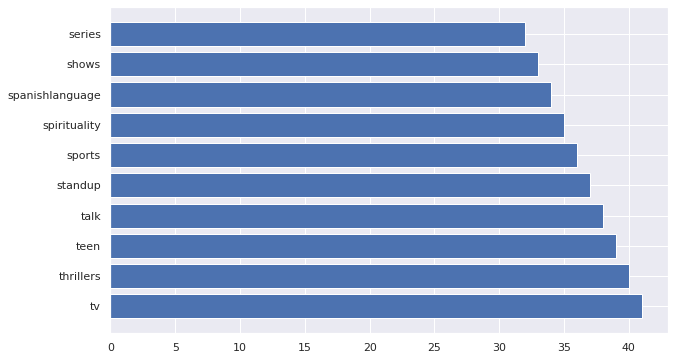

In [82]:
# plot graph for words in listed_in
plt.figure( figsize = (10,6 ))
plt.barh(top_10vocab_before_stemming['Word'] , top_10vocab_before_stemming['count'] )

### **SnowballStemmer( 'english' )**

In [83]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [84]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [85]:
#Stemming for listed_in
netflix_df['listed_in'] = netflix_df['listed_in'].apply( Apply_stemming )
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                     listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description  count first_country  \
0  In a future where the elite inhabit an island ...      1        Brazil   
1  After a devastating earthquake hits Mexico Cit...      1        Mexico   
2  When an army recruit is found dead, his fellow...      1     Singapore   
3  In a postapocalyptic world, rag-doll robots hi...      1           USA   
4  A brilliant group of students become card-coun...      1           USA   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   
3              Nov       Teens   
4              Jan       Teens   

                                               genre  category_count  
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3  
1                     [Dramas, International Movies]               2  
2              [Horror Movies, International Movies]               2  
3  [Action & Adventure, Independent Movies, Sci-F...               3  
4                                           [Dramas]               1

### **TfidfVectorizer (after stemming)**

In [86]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [87]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

### **vocab_after_stemming**

In [88]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [89]:
# top 10 words
top10_most_occurred_words = vocab_after_stemming.head(10)
top10_most_occurred_words

Word  count
1               tv     39
12        thriller     38
38            teen     37
37            talk     36
36         standup     35
16           sport     34
29         spiritu     33
31  spanishlanguag     32
2             show     31
19            seri     30

<BarContainer object of 10 artists>

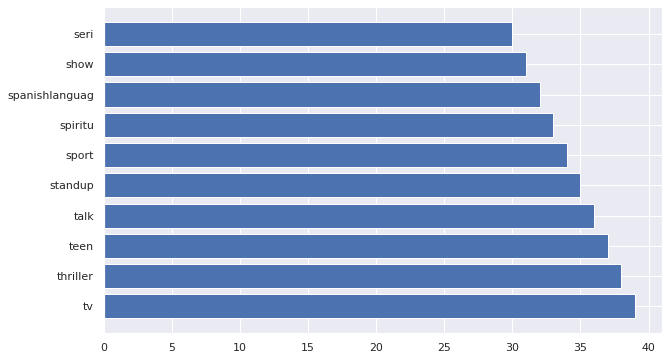

In [90]:
# plot graph for words count
plt.figure( figsize = (10,6 ))
plt.barh(top10_most_occurred_words['Word'] , top10_most_occurred_words['count'] )

In [91]:
##Adding a new column length which will contain length of description
netflix_df['Length_listed_in'] = netflix_df['listed_in'].apply(lambda x: len(x))

In [92]:
netflix_df.head(4)

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   

                                     listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   

                                         description  count first_country  \
0  In a future where the elite inhabit an island ...      1        Brazil   
1  After a devastating earthquake hits Mexico Cit...      1        Mexico   
2  When an army recruit is found dead, his fellow...      1     Singapore   
3  In a postapocalyptic world, rag-doll robots hi...      1           USA   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   
3              Nov       Teens   

                                               genre  category_count  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3   
1                     [Dramas, International Movies]               2   
2              [Horror Movies, International Movies]               2   
3  [Action & Adventure, Independent Movies, Sci-F...               3   

   Length_listed_in  
0                40  
1                17  
2                23  
3                43

## **description**

### **Remove_punctuation**

In [93]:
# remove punctuation
netflix_df['description'] = netflix_df['description'].apply(remove_punctuation)
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                     listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description  count first_country  \
0  In a future where the elite inhabit an island ...      1        Brazil   
1  After a devastating earthquake hits Mexico Cit...      1        Mexico   
2  When an army recruit is found dead his fellow ...      1     Singapore   
3  In a postapocalyptic world ragdoll robots hide...      1           USA   
4  A brilliant group of students become cardcount...      1           USA   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   
3              Nov       Teens   
4              Jan       Teens   

                                               genre  category_count  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3   
1                     [Dramas, International Movies]               2   
2              [Horror Movies, International Movies]               2   
3  [Action & Adventure, Independent Movies, Sci-F...               3   
4                                           [Dramas]               1   

   Length_listed_in  
0                40  
1                17  
2                23  
3                43  
4                 5

### **Removing stopwords**

In [94]:
#Remove stopwords for description
netflix_df['description'] =netflix_df['description'].apply( remove_stopwords )
netflix_df.head( 2 )

show_id     type title           director  \
0      s1  TV Show    3%        No Director   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   

                                  listed_in  \
0  intern tv show tv drama tv scifi fantasi   
1                         drama intern movi   

                                         description  count first_country  \
0  future elite inhabit island paradise far crowd...      1        Brazil   
1  devastating earthquake hits mexico city trappe...      1        Mexico   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   

                                               genre  category_count  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3   
1                     [Dramas, International Movies]               2   

   Length_listed_in  
0                40  
1                17

### **CountVectorizer() to count vocabulary items**

In [95]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix_df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [96]:
#print dict
dictionary

dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('dangerous', 4419), ('machines', 10525), ('exterminate',

In [97]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [98]:
# creating dataframe
vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
vocab_before_stem = vocab_before_stem.sort_values("count" ,ascending=False)

In [99]:
# top 10 words
vocab_before_stem = vocab_before_stem.head(10)
vocab_before_stem

Word  count
18855      şeref  19593
10390      ōarai  19592
12377     łukasz  19591
11101  überelite  19590
11673       über  19589
13288       ömer  19588
6584       émile  19587
18193      ángel  19586
10428     álvaro  19585
9867        álex  19584

<BarContainer object of 10 artists>

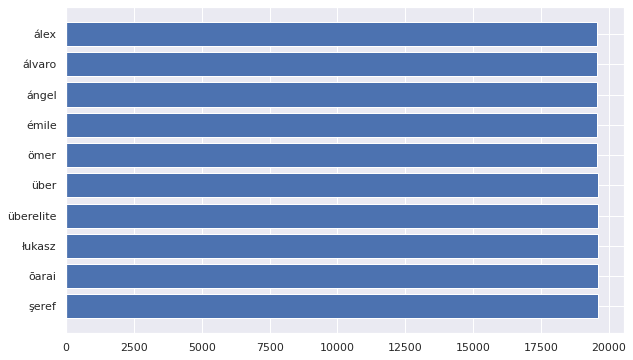

In [100]:
# plot graph for words in description
plt.figure( figsize = ( 10,6 ))
#plt.xlim(18090,18125)
plt.barh(vocab_before_stem['Word'] , vocab_before_stem['count'] )

### **SnowballStemmer( 'english' )**

In [101]:
#Stemming for description
netflix_df['description'] = netflix_df['description'].apply( Apply_stemming )
netflix_df.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                  listed_in  \
0  intern tv show tv drama tv scifi fantasi   
1                         drama intern movi   
2                   horror movi intern movi   

                                         description  count first_country  \
0  futur elit inhabit island paradis far crowd sl...      1        Brazil   
1  devast earthquak hit mexico citi trap survivor...      1        Mexico   
2  armi recruit found dead fellow soldier forc co...      1     Singapore   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   

                                               genre  category_count  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3   
1                     [Dramas, International Movies]               2   
2              [Horror Movies, International Movies]               2   

   Length_listed_in  
0                40  
1                17  
2                23

### **TfidfVectorizer (after stemming)**

In [102]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [103]:
# print dict
dictionary

dict_items([('futur', 5120), ('elit', 4104), ('inhabit', 6479), ('island', 6648), ('paradis', 9343), ('far', 4577), ('crowd', 3135), ('slum', 11667), ('get', 5273), ('one', 9068), ('chanc', 2358), ('join', 6830), ('save', 11024), ('squalor', 11975), ('devast', 3534), ('earthquak', 3994), ('hit', 6028), ('mexico', 8135), ('citi', 2565), ('trap', 12960), ('survivor', 12363), ('walk', 13678), ('life', 7419), ('wait', 13666), ('rescu', 10542), ('tri', 12989), ('desper', 3506), ('stay', 12057), ('aliv', 632), ('armi', 972), ('recruit', 10386), ('found', 4957), ('dead', 3330), ('fellow', 4667), ('soldier', 11765), ('forc', 4910), ('confront', 2855), ('terrifi', 12633), ('secret', 11154), ('that', 12664), ('haunt', 5804), ('jungl', 6901), ('train', 12940), ('camp', 2132), ('postapocalypt', 9818), ('world', 13996), ('ragdol', 10205), ('robot', 10735), ('hide', 5947), ('fear', 4636), ('danger', 3276), ('machin', 7697), ('extermin', 4487), ('brave', 1844), ('newcom', 8727), ('group', 5564), ('br

In [104]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

### **vocab_after_stemming_description**

In [105]:
vocab_after_stemming_desp = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_desp = vocab_after_stemming_desp.sort_values("count" ,ascending=False)

In [106]:
# top 10 words
top10_most_ocurred_vocab_desp_in_after_stem = vocab_after_stemming_desp.head(10)
top10_most_ocurred_vocab_desp_in_after_stem

Word  count
13710     şeref  14240
7768      ōarai  14239
9157     łukasz  14238
8280   überelit  14237
8671       über  14236
9788       ömer  14235
5108      émile  14234
13251     ángel  14233
7796     álvaro  14232
7389       álex  14231

<BarContainer object of 10 artists>

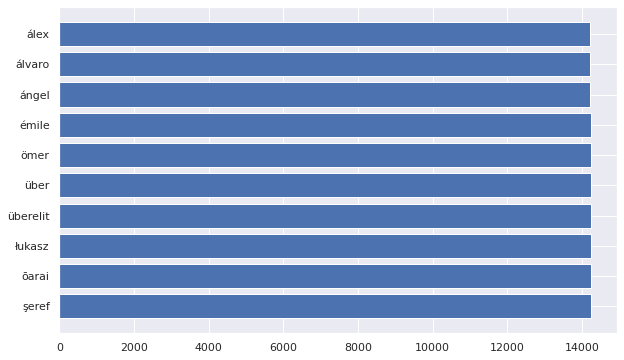

In [107]:
# graph for words in description column
plt.figure( figsize = ( 10,6 ))
plt.barh(top10_most_ocurred_vocab_desp_in_after_stem['Word'] , top10_most_ocurred_vocab_desp_in_after_stem['count'] )

In [108]:
# create new column
netflix_df['Length_description'] = netflix_df['description'].apply(lambda x: len(x))
netflix_df.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                  listed_in  \
0  intern tv show tv drama tv scifi fantasi   
1                         drama intern movi   
2                   horror movi intern movi   

                                         description  count first_country  \
0  futur elit inhabit island paradis far crowd sl...      1        Brazil   
1  devast earthquak hit mexico citi trap survivor...      1        Mexico   
2  armi recruit found dead fellow soldier forc co...      1     Singapore   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   
2              Dec      Adults   

                                               genre  category_count  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3   
1                     [Dramas, International Movies]               2   
2              [Horror Movies, International Movies]               2   

   Length_listed_in  Length_description  
0                40                  82  
1                17                  88  
2                23                 102

In [109]:
netflix_df[['category_count','description', 'Length_description', 'listed_in' ,'Length_listed_in' ]].head(3)

category_count                                        description  \
0               3  futur elit inhabit island paradis far crowd sl...   
1               2  devast earthquak hit mexico citi trap survivor...   
2               2  armi recruit found dead fellow soldier forc co...   

   Length_description                                 listed_in  \
0                  82  intern tv show tv drama tv scifi fantasi   
1                  88                         drama intern movi   
2                 102                   horror movi intern movi   

   Length_listed_in  
0                40  
1                17  
2                23

# **Clustering Algorithms**

In [110]:
netflix_df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%        No Director   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   

                                  listed_in  \
0  intern tv show tv drama tv scifi fantasi   
1                         drama intern movi   

                                         description  count first_country  \
0  futur elit inhabit island paradis far crowd sl...      1        Brazil   
1  devast earthquak hit mexico citi trap survivor...      1        Mexico   

  month_name_added target_ages  \
0              Aug      Adults   
1              Dec      Adults   

                                               genre  category_count  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...               3   
1                     [Dramas, International Movies]               2   

   Length_listed_in  Length_description  
0                40                  82  
1                17                  88

In [111]:
# feature selected for clustring
X_features= netflix_df[['Length_description','Length_listed_in','category_count']]
#Initialize our scaler
scaler = preprocessing.StandardScaler()

In [112]:
# selected feature
X_features.describe()

Length_description  Length_listed_in  category_count
count         7777.000000       7777.000000     7777.000000
mean            93.010930         24.328019        2.192491
std             10.773339         10.685483        0.786070
min             25.000000          4.000000        1.000000
25%             87.000000         17.000000        2.000000
50%             93.000000         24.000000        2.000000
75%            100.000000         32.000000        3.000000
max            185.000000         62.000000        3.000000

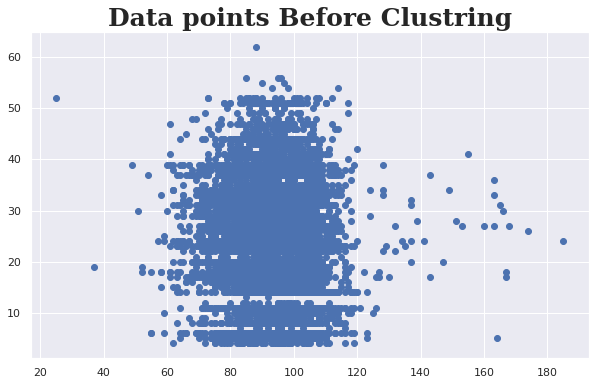

In [113]:
# plot scatterplot before clustring 
plt.figure(figsize=(10 , 6))
plt.title('Data points Before Clustring',fontsize=25, fontweight='bold', fontfamily='serif')
plt.scatter(X_features['Length_description'], X_features['Length_listed_in'])

In [114]:
# fit the featurefor rescaling
X_rescale=scaler.fit_transform(X_features)
X=X_rescale
silhouette_score_ = []
# define no. of cluster
range_n_clusters = [i for i in range(2,17)]

In [115]:
# each no. of cluster with silhouette score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4283579787068068
For n_clusters = 3, silhouette score is 0.38328727950619673
For n_clusters = 4, silhouette score is 0.3742864231748872
For n_clusters = 5, silhouette score is 0.3712782674917959
For n_clusters = 6, silhouette score is 0.36816701355396847
For n_clusters = 7, silhouette score is 0.3763230698992139
For n_clusters = 8, silhouette score is 0.354038882690086
For n_clusters = 9, silhouette score is 0.3738606238597852
For n_clusters = 10, silhouette score is 0.36402671423472827
For n_clusters = 11, silhouette score is 0.35525484470228186
For n_clusters = 12, silhouette score is 0.348592097396998
For n_clusters = 13, silhouette score is 0.3530197107839301
For n_clusters = 14, silhouette score is 0.33511736158904953
For n_clusters = 15, silhouette score is 0.3423787901285995
For n_clusters = 16, silhouette score is 0.33753143799093227


In [116]:
# create dataframe for number of cluster and silhouette score
df = pd.DataFrame(silhouette_score_ , columns = ["n_of_clusters" , "silhouette_score"])
df = df.sort_values( "silhouette_score" , ascending = False )
df.head()

n_of_clusters  silhouette_score
0              2             0.428
1              3             0.383
5              7             0.376
2              4             0.374
7              9             0.374

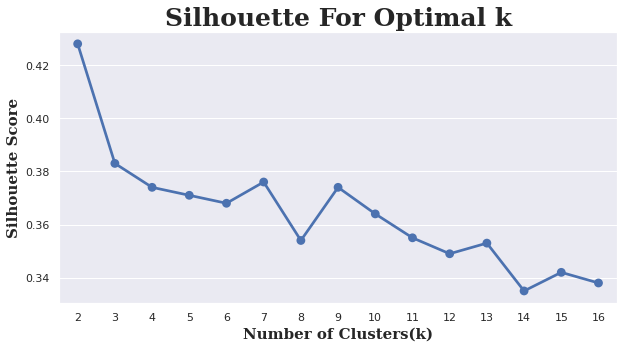

In [117]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(10,5))
#plot ponitplot
sns.pointplot(x =df.n_of_clusters, y =df.silhouette_score)
plt.xlabel('Number of Clusters(k)',fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Silhouette Score',fontsize=15, fontweight='bold', fontfamily='serif')
plt.title('Silhouette For Optimal k',fontsize=25, fontweight='bold', fontfamily='serif')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4282097956613753
For n_clusters = 3 The average silhouette_score is : 0.38328727950619673
For n_clusters = 4 The average silhouette_score is : 0.3742864231748872
For n_clusters = 5 The average silhouette_score is : 0.37213696566468973
For n_clusters = 6 The average silhouette_score is : 0.36739020687113405
For n_clusters = 7 The average silhouette_score is : 0.3529487489931506
For n_clusters = 8 The average silhouette_score is : 0.36860653823270173
For n_clusters = 9 The average silhouette_score is : 0.37375194836030784
For n_clusters = 10 The average silhouette_score is : 0.36255494192563753
For n_clusters = 11 The average silhouette_score is : 0.35459416574459185
For n_clusters = 12 The average silhouette_score is : 0.35052049699598065
For n_clusters = 13 The average silhouette_score is : 0.3550926092574054
For n_clusters = 14 The average silhouette_score is : 0.3339220575630027
For n_clusters = 15 The average silhouette_score is

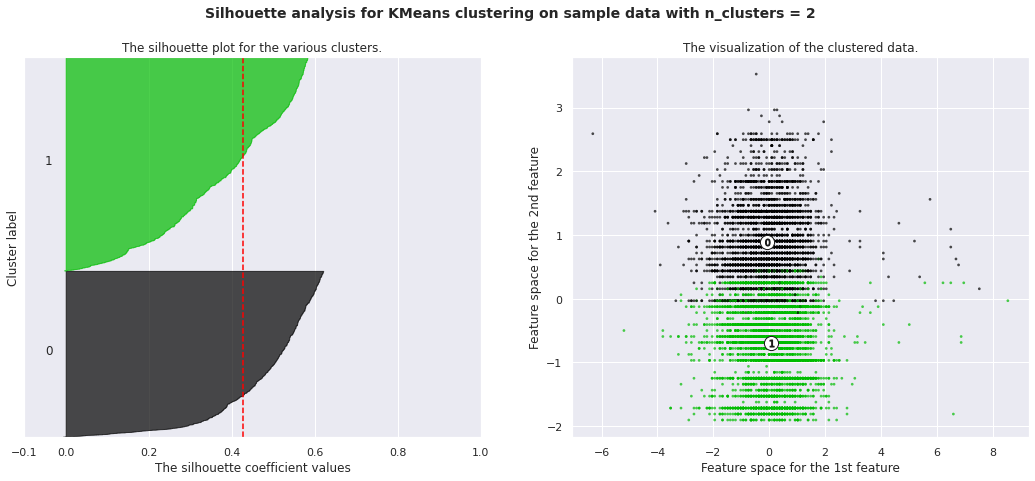

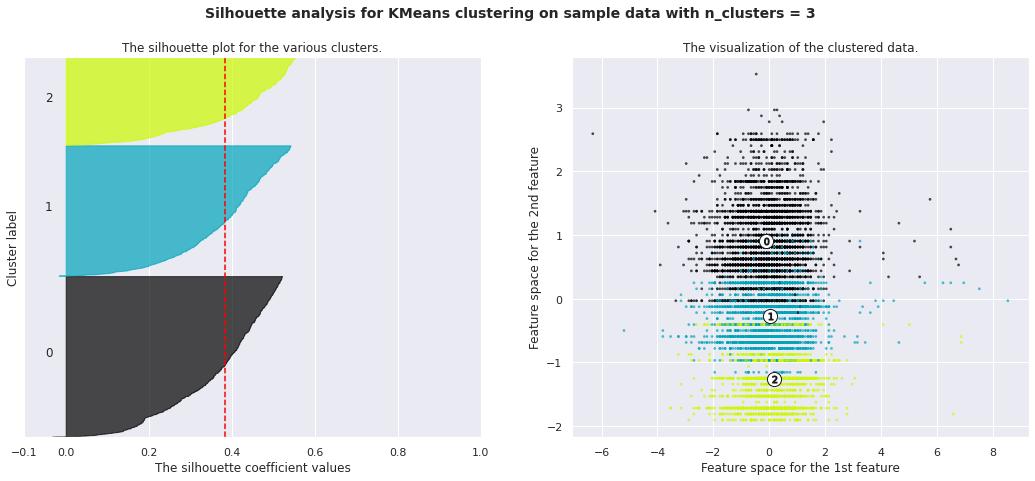

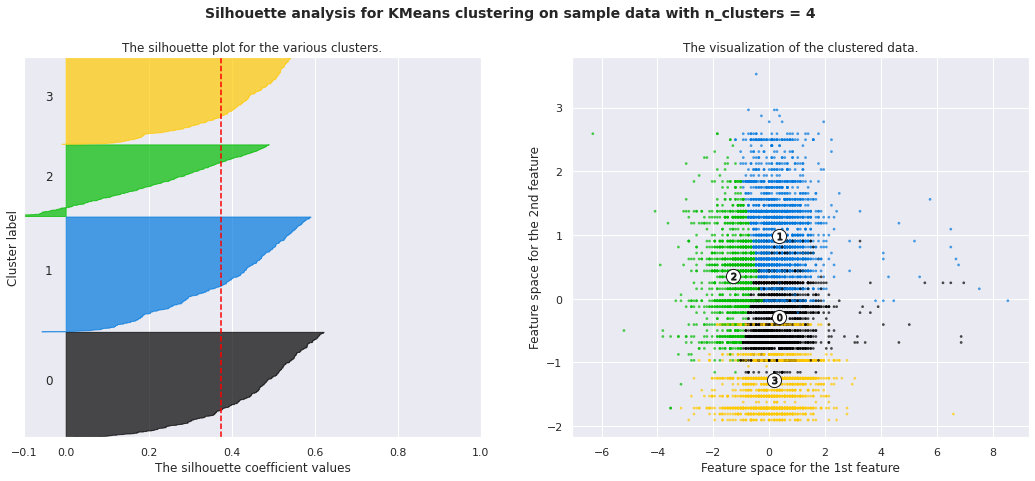

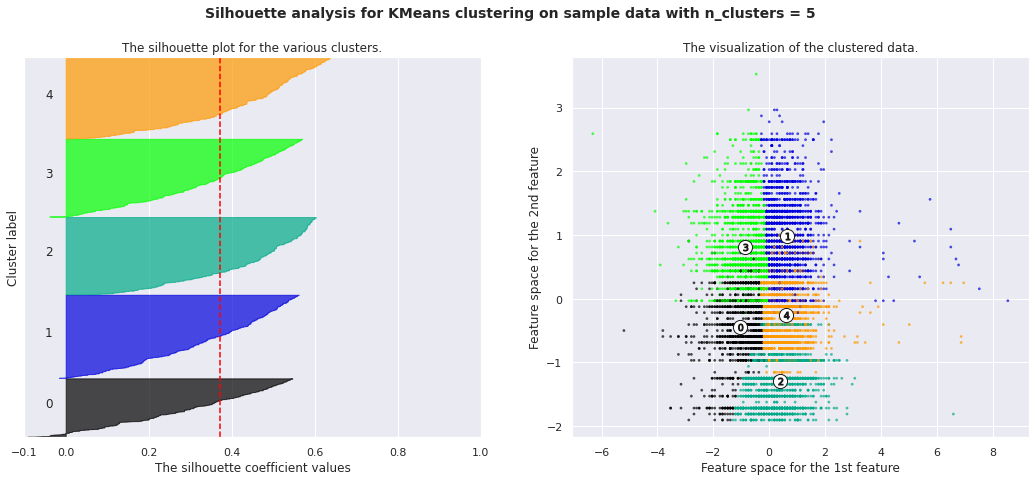

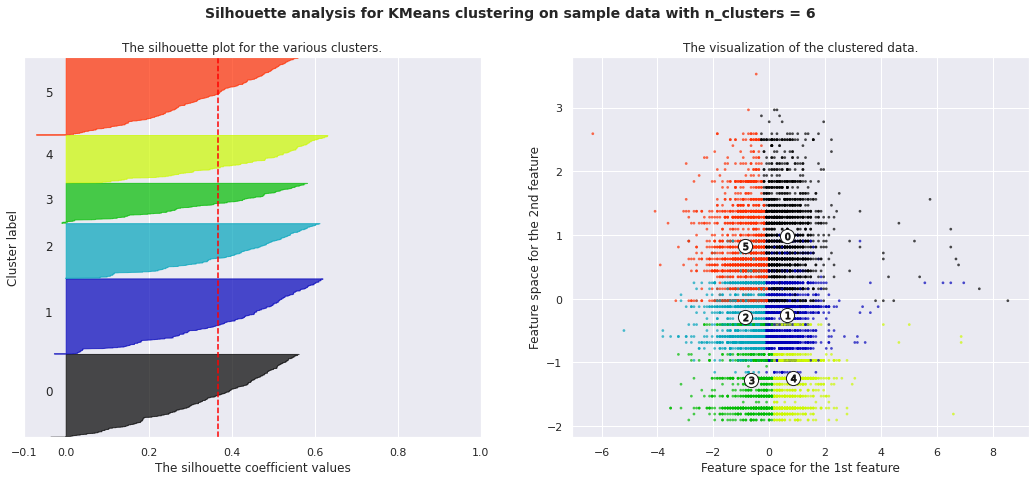

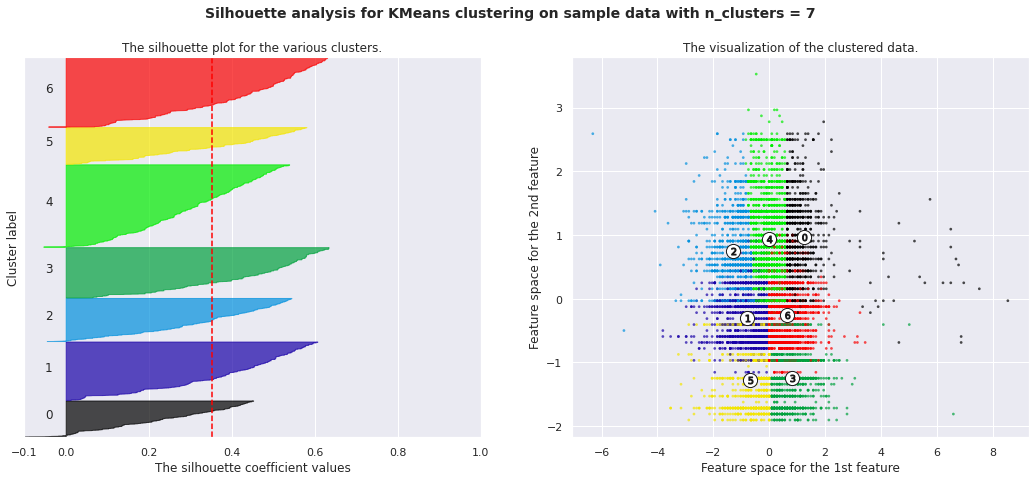

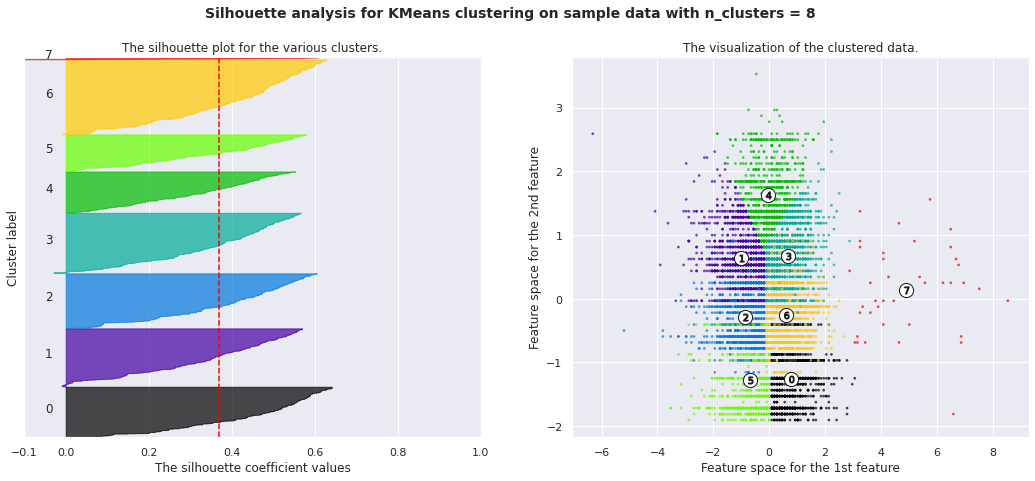

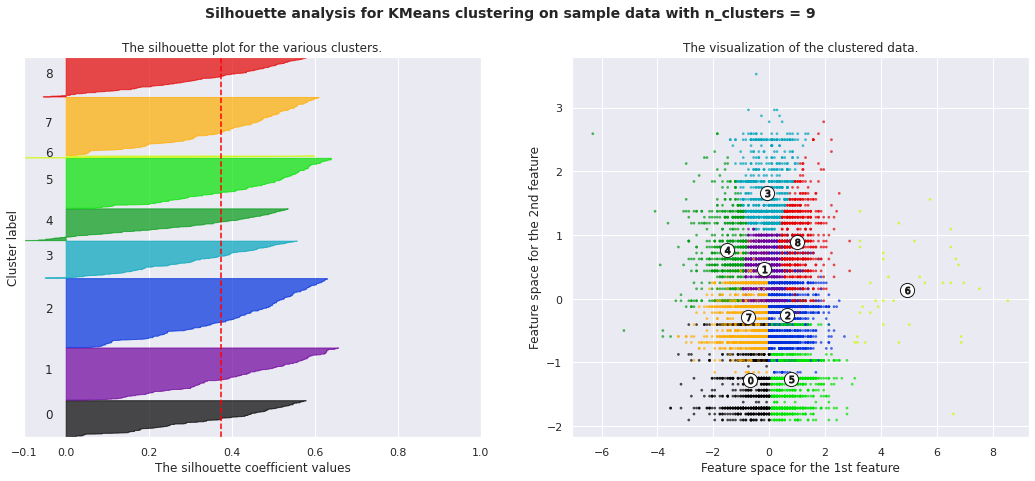

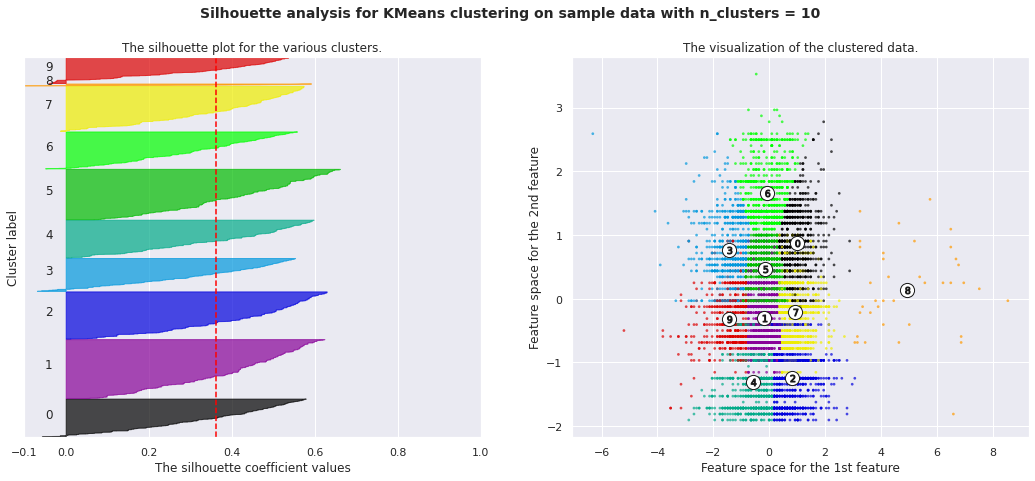

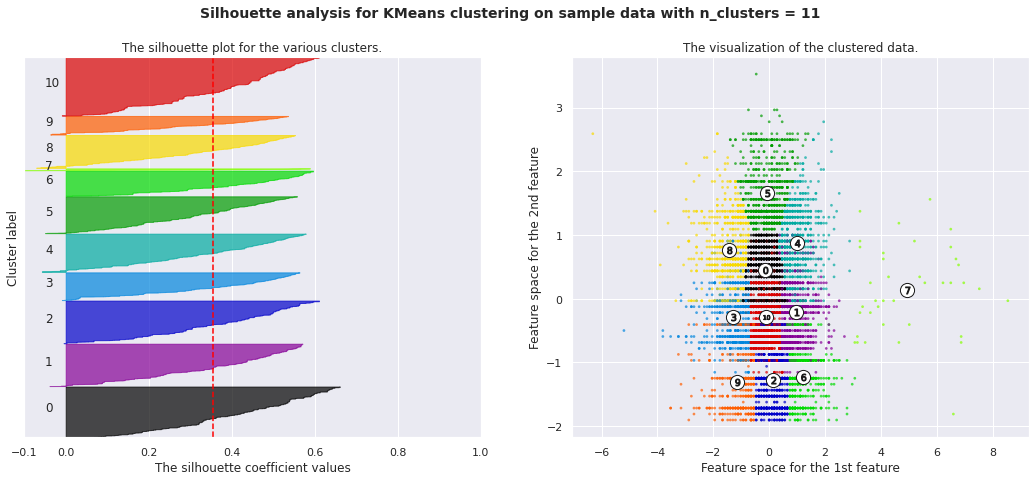

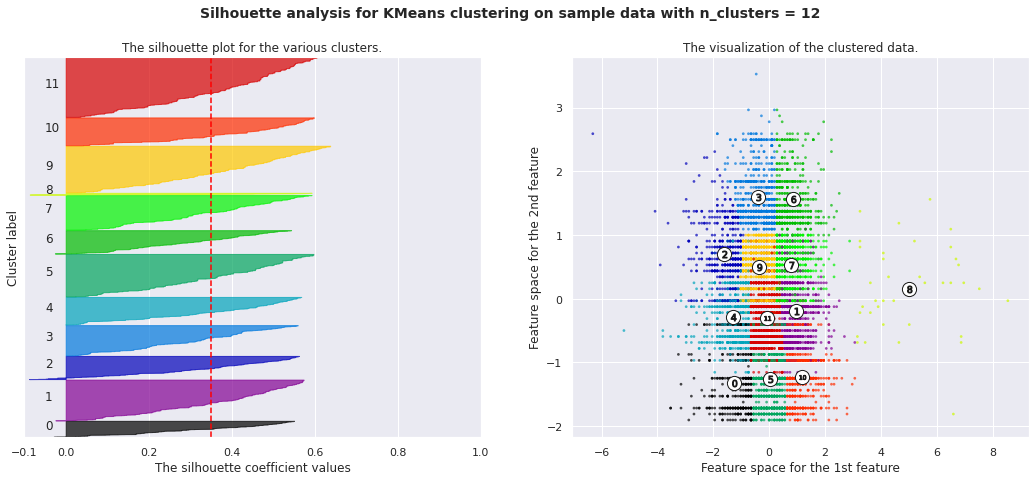

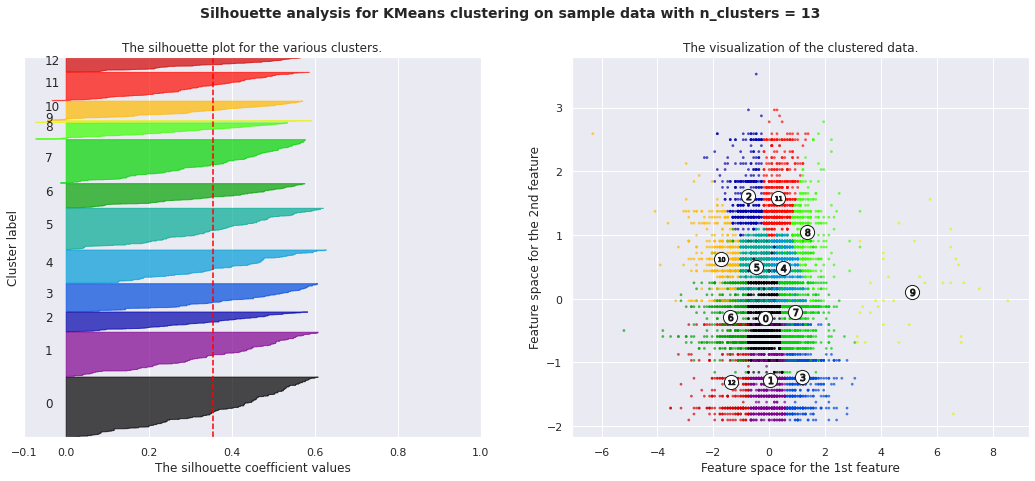

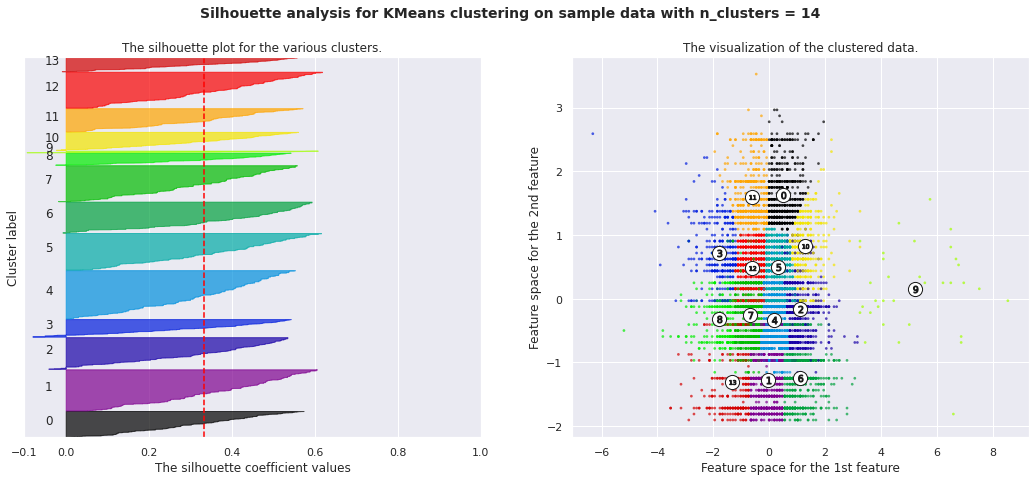

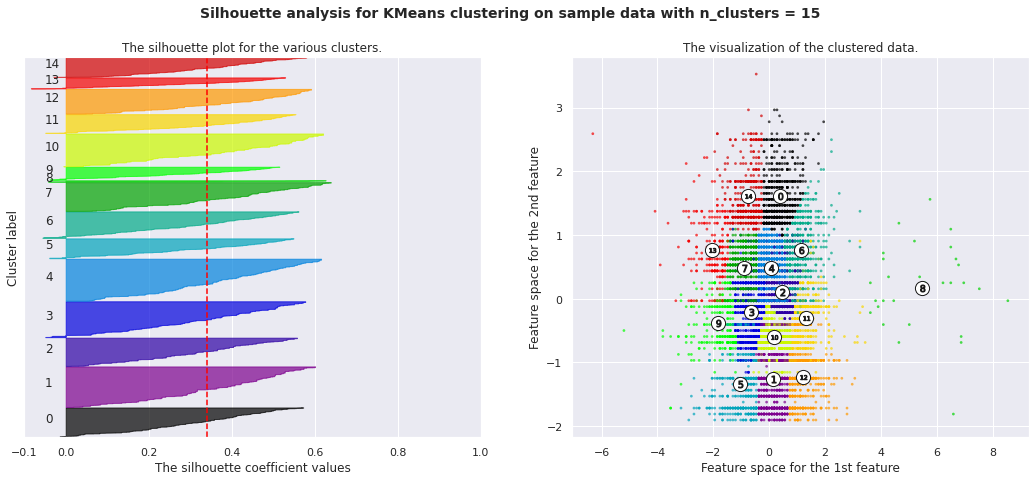

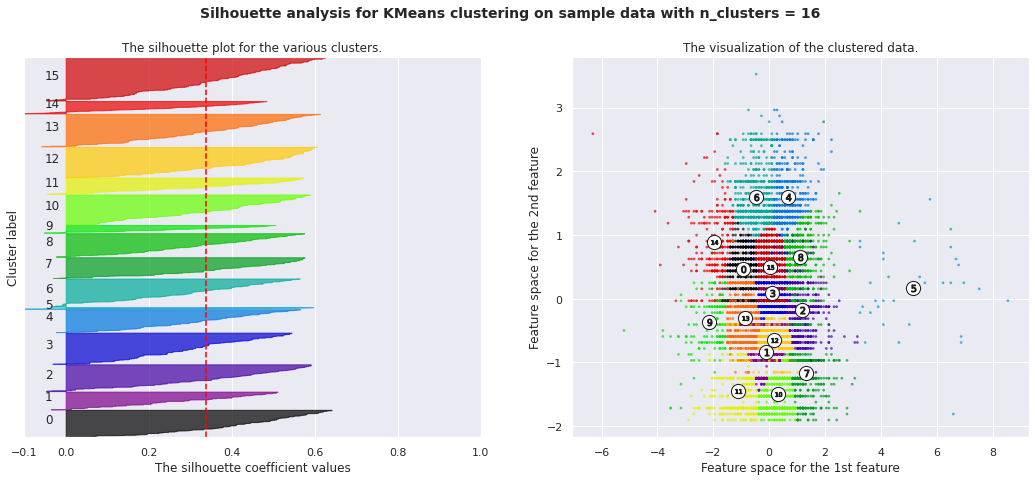

In [118]:
range_n_clusters = [i for i in range(2,17)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Elbow Method**

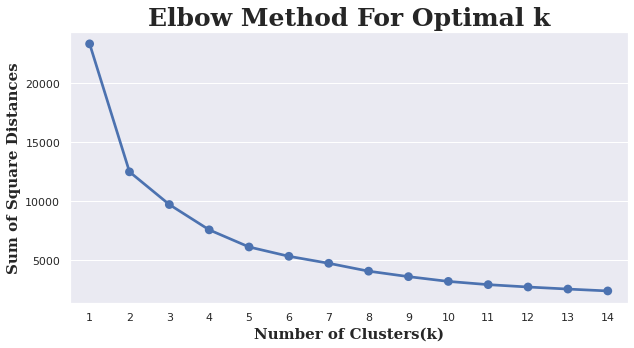

In [119]:
# calulate sum of  square distance for each cluster
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(10,5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)',fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Sum of Square Distances',fontsize=15, fontweight='bold', fontfamily='serif')
plt.title('Elbow Method For Optimal k',fontsize=25, fontweight='bold', fontfamily='serif')
plt.show()

### **From  the silhouette score and elbow method we find the n_cluster=3 is best optinal cluster for this dataset.**

In [128]:
#k means clustring for 3 clustres
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

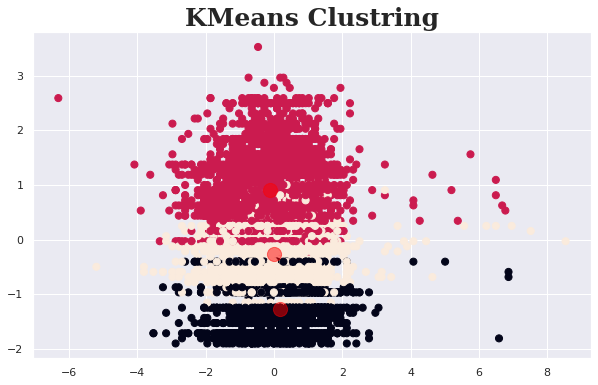

In [129]:
#plot graph
plt.figure(figsize=(10 , 6))
plt.title('KMeans Clustring',fontsize=25, fontweight='bold', fontfamily='serif')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

# cluster center
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

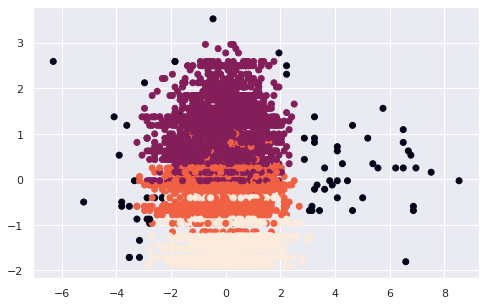

In [130]:
#plot for DBSCAN clustring
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### In above graph the black points considered to be an outliers.

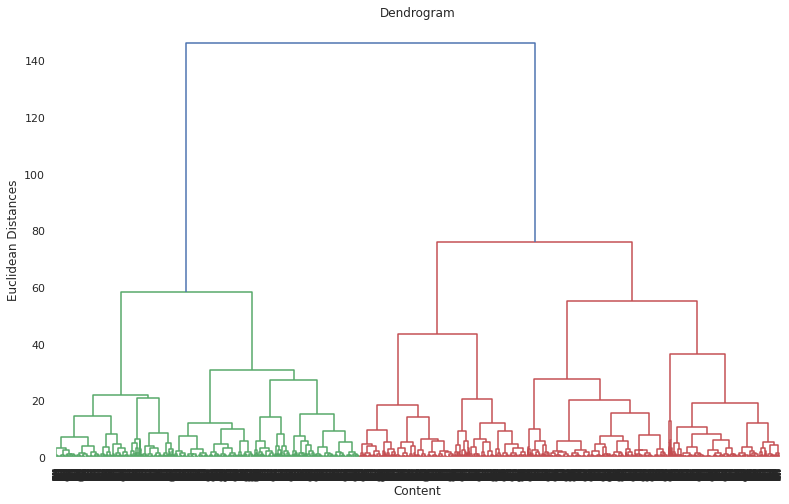

In [123]:
#plot dendrogram
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# **Hirachical/AgglomerativeClustering**

In [126]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

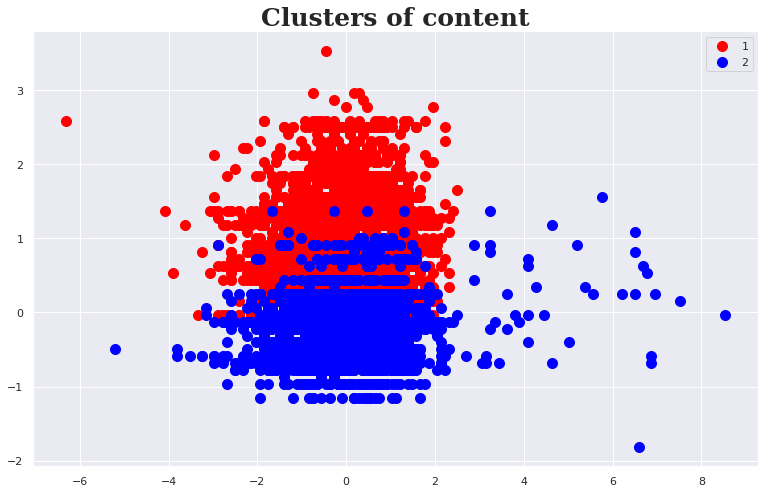

In [127]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.title('Clusters of content',fontsize=25, fontweight='bold', fontfamily='serif')

plt.legend()
plt.show()

# **Conclusion**
---
**1) We observe that in this dataset  4,000+ movies and almost 2,000 shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes.in terms of title, there are far more movie titles (69.1%) than TV show titles (30.9%).**

**2) Films typically are available in multiple countries as shown in the dataset. Therefore, we need to seperate all countries within a film before we can analyze the data(create first_country column). After seperating countries and removing titles with no countries available, we can plot a Top 10 list to see which countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada.**

**3) In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.**

**4) From the lineplot we can conclude that the most number of TV Shows     released in 2017 and for Movies it is 2020.Spain have the newest content overall(both Movie & TV-Shows)**

**5) The end & beginnings of each year seem to be Netflix's preference for adding content.Least number of contents are added in the month of February**

**6) On netflix there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.**

**7) The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.**


**8) The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai.**


**9) In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF vectorizer and other functions of NLP.**

**10) We Applied different clustering models like Kmeans, Agglomerative clustering, DBSCAN on data we got the best cluster arrangements.**

**11) By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3.**



